# Introduction
- Using visualizations to explore a dataset then polish a key plot that tells a story to the audience

#### Dataset Overview

In [97]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
import sklearn
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

warnings.filterwarnings('ignore')

In [98]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [99]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [100]:
# descriptive statistics for numeric values
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Univariate Exploration
__Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?__

In [101]:
base_color = sb.color_palette('viridis', 9) [2]

Text(0.5, 1.0, 'Distribution of Diamond Price')

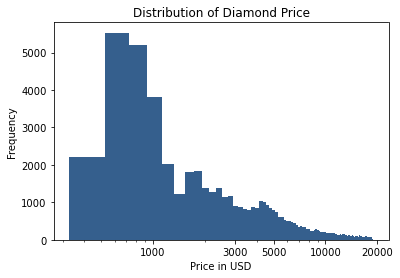

In [102]:
# univariate exploration of diamond prices
bins = np.arange(326, diamonds['price'].max()+200, 200)
plt.hist(data=diamonds, x='price', bins=bins, color=base_color)
plt.xscale('log')
tick_locs = [1000, 3000, 5000, 10000, 20000]
plt.xticks(tick_locs, tick_locs);
plt.xlabel('Price in USD')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Price')

- The data is roughly bimodal with a highly skewed distribution

__Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?__

Text(0.5, 1.0, 'Distribution of Diamond Carat Weight')

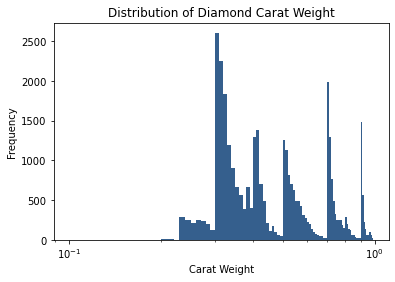

In [103]:
# univariate plot of carat weights
bins = np.arange(0.1, 1, 0.01)
plt.hist(diamonds['carat'], bins=bins , color=base_color)
plt.xscale('log')
plt.xlabel('Carat Weight')
plt.ylabel('Frequency')
plt.title('Distribution of Diamond Carat Weight')


- there is an interesting pattern in carat weights, where there is a large spike around a single decimal value, then a gradual tailing off to the right until the next spike

__Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?__

In [105]:
diamonds.cut.unique().tolist()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

<AxesSubplot:xlabel='clarity', ylabel='count'>

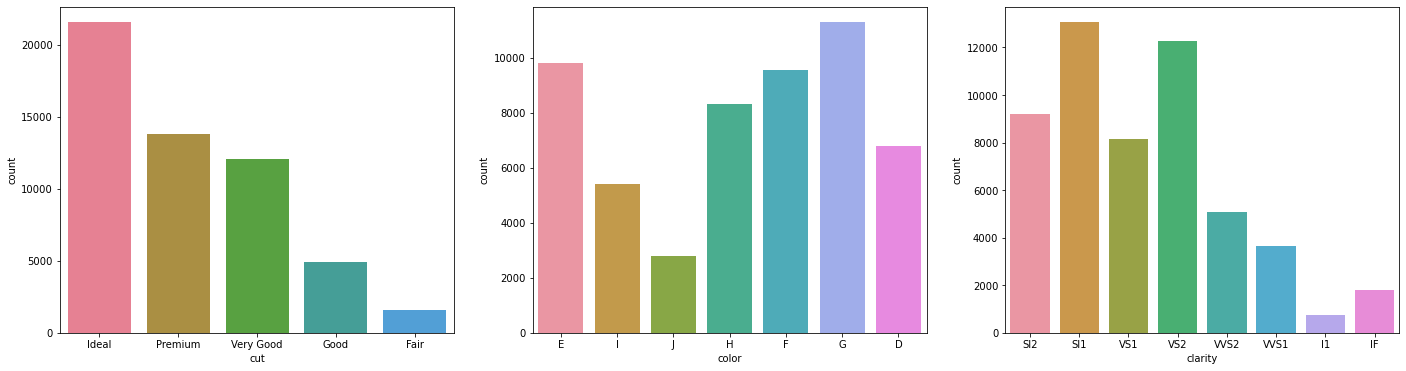

In [106]:
# univariate plots of cut, color, and clarity grades
plt.figure(figsize=[24, 6])

plt.subplot(1, 3, 1)
ordered_cat = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
cat_type = pd.api.types.CategoricalDtype(categories=ordered_cat, ordered=True)
diamonds['cut'] = diamonds['cut'].astype(cat_type)
sb.countplot(data=diamonds, x='cut');

plt.subplot(1, 3, 2)
ordered_cat2 = diamonds['color'].unique().tolist()
cat_type2 = pd.api.types.CategoricalDtype(categories=ordered_cat2, ordered=True)
diamonds['color'] = diamonds['color'].astype(cat_type2)
sb.countplot(data=diamonds, x='color')

plt.subplot(1, 3, 3)
ordered_cat3 = diamonds['clarity'].unique().tolist()
cat_type3 = pd.api.types.CategoricalDtype(categories=ordered_cat3, ordered=True)
diamonds['clarity'] = diamonds['clarity'].astype(cat_type3)
sb.countplot(data=diamonds, x='clarity')

- The mode cut quality for diamonds in this dataset is the highest grade, Ideal. There is a consistent decrease in number of diamonds of lower cut grades.
- The distribution is roughly unimodal, with the most common color grade in this dataset belonging to the central grade represented, G.
- There is a right-skew in the clarity grades represented in the dataset, with most of the diamonds collected having slight or very slight inclusions (SI2, SI1, VS2, VS1). There are very few diamonds with visible inclusions (I1).